# 單類別支撐向量機(One Class Support Vector Machine)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import random
import cvxopt
from cvxopt import matrix, solvers
from numpy import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

##### 設定我們有60個點，其中30個是圈圈，30個是叉叉

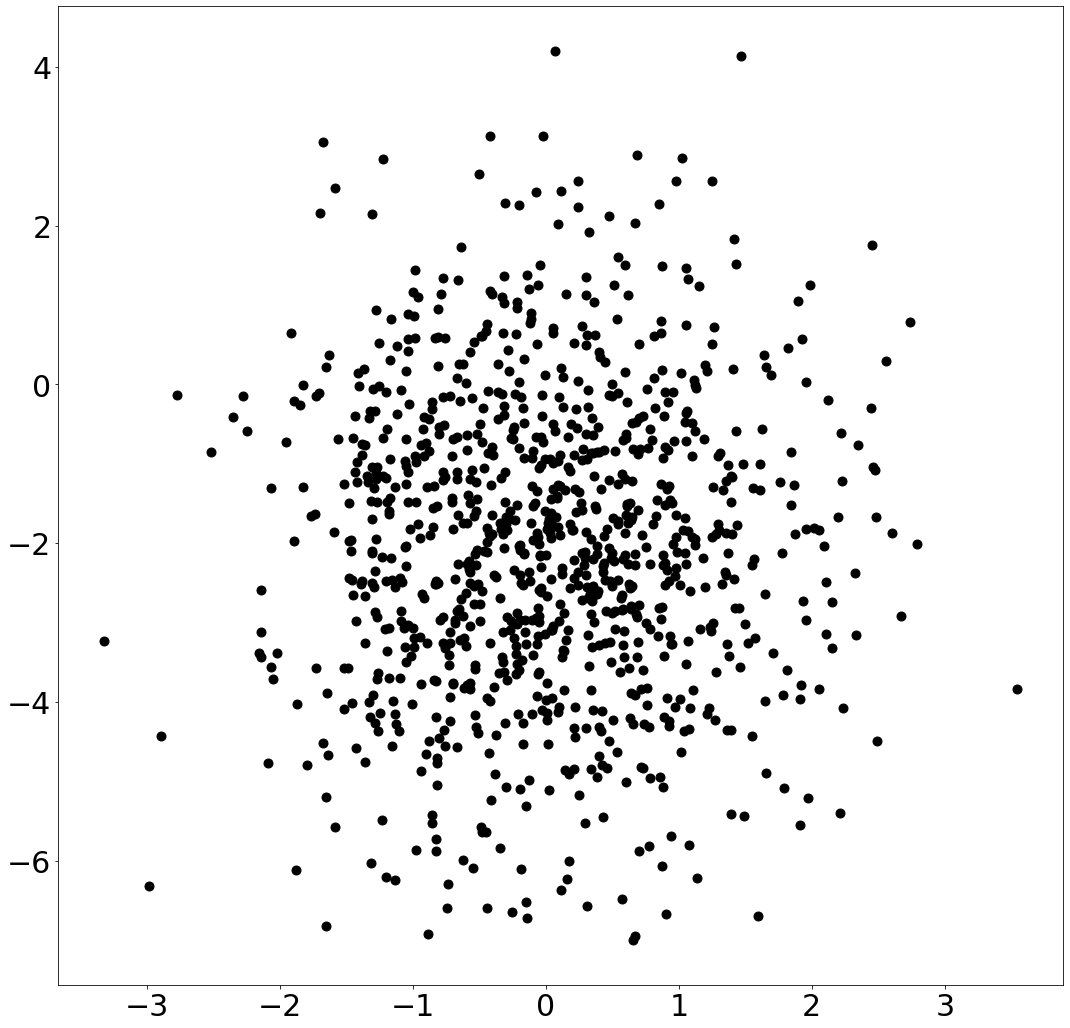

In [2]:
N=1000
x=np.zeros((N,2))
y=random.randint(0,N)
plt.rcParams["figure.figsize"] = (18,18)
x[:,0]=random.normal(loc=0, scale=1, size=N)
x[:,1]=random.normal(loc=-2, scale=2, size=N)
plt.plot(x[:,0],x[:,1],"ko",markersize=9)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

# Gaussian Kernel

In [3]:
def Gaussian_kernel(x,xx,gamma):
    if(len(x)==2):
        Aa=(x**2).sum(axis=0)
        x_len=1
    else:
        Aa=(x**2).sum(axis=1)
        x_len=len(x)
    if(len(xx)==2):
        Bb=(xx**2).sum(axis=0)
        xx_len=1
    else:
        Bb=(xx**2).sum(axis=1)
        xx_len=len(xx)
    AA=Aa.reshape(x_len,1)
    BB=Bb.reshape(1,xx_len)
    return np.exp(-gamma*(AA+BB-2*np.dot(x,xx.T)))

# OCSVM

In [4]:
gamma=0.5
v=0.1
Q = cvxopt.matrix(Gaussian_kernel(x,x,gamma))
p = cvxopt.matrix(np.zeros(N),(N,1))
G = cvxopt.matrix(np.concatenate([np.diag(np.ones(N)* 1.),np.diag(np.ones(N)* -1.)])) 
h = cvxopt.matrix(np.concatenate([1/(v*N)*np.ones(N),np.zeros(N)]))
A = cvxopt.matrix(np.ones(N),(1,N))
b = cvxopt.matrix(1.)
cvxopt.solvers.options['show_progress'] = False
cvxopt.solvers.options['abstol'] = 1e-10
cvxopt.solvers.options['reltol'] = 1e-10
cvxopt.solvers.options['feastol'] = 1e-10
a=np.array(cvxopt.solvers.qp(Q, p, G, h, A, b)['x']).flatten()
SV=[]
for i in range(0,N):
    if(a[i]>1e-6):
        SV.append(i)
Com=0
s=SV[0]
for i in range(0,N):
    Com+=a[i]*Gaussian_kernel(x[i,:],x[s,:],gamma)
b=-Com

# Plot

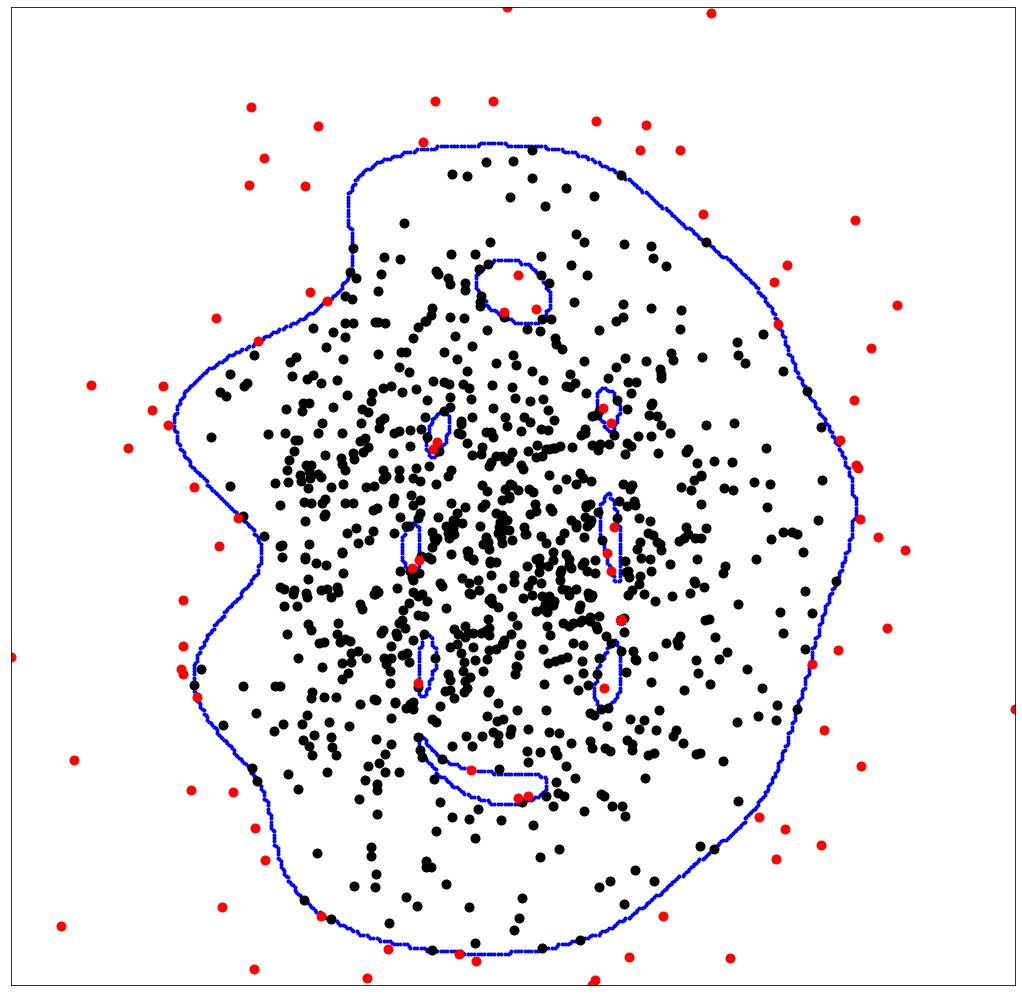

In [5]:
sol=300
x1=np.linspace(min(x[:,0]),max(x[:,0]),sol)
x2=np.linspace(min(x[:,1]),max(x[:,1]),sol)
temp_a_1=np.zeros((sol,sol))
for i in range(0,sol):
    temp_array=np.zeros((sol,2))
    temp_array[:,0],temp_array[:,1]=x1,np.ones(sol)*x2[i]
    temp_a_1[:,i]=np.dot(Gaussian_kernel(temp_array,x,gamma),a)+b
    for j in range(0,len(temp_a_1)-1):
        if(np.sign(temp_a_1[j,i])!=np.sign(temp_a_1[j+1,i])):
            plt.plot((x1[j]+x1[j+1])/2,x2[i],marker=".",c="b")
temp_a_2=np.zeros((sol,sol))
for i in range(0,sol):
    temp_array=np.zeros((sol,2))
    temp_array[:,0],temp_array[:,1]=np.ones(sol)*x1[i],x2
    temp_a_2[:,i]=np.dot(Gaussian_kernel(temp_array,x,gamma),a)+b
    for j in range(0,len(temp_a_2)-1):
        if(np.sign(temp_a_2[j,i])!=np.sign(temp_a_2[j+1,i])):
            plt.plot(x1[i],(x2[j]+x2[j+1])/2,marker=".",c="b")
f=np.dot(Gaussian_kernel(x,x,gamma),a)+b
index_pos=np.array(np.where(np.sign(f)==1)).flatten()
index_neg=np.array(np.where(np.sign(f)!=1)).flatten()
plt.plot(x[index_pos,0],x[index_pos,1],"ko",markersize=9)
plt.plot(x[index_neg,0],x[index_neg,1],"ro",markersize=9)
plt.xlim(min(x[:,0]),max(x[:,0]))
plt.ylim(min(x[:,1]),max(x[:,1]))
plt.xticks([])
plt.yticks([])
plt.show()